<a href="https://colab.research.google.com/github/Anmolsriv2003/machine_learning/blob/main/breast_cancer_classification_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [5]:
df['output'] = breast_cancer.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential

In [8]:
x = df.drop(columns = 'output')
y = df['output']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [9]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [20]:
# building the architechture of neural networks

model = Sequential()

model.add(Dense(20,activation='relu',input_dim = 30))
model.add(Dense(2,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [22]:
history = model.fit(x_train_sc,y_train,epochs = 10,validation_split = 0.1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4128 - loss: 0.9138 - val_accuracy: 0.5870 - val_loss: 0.7109
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5962 - val_accuracy: 0.7609 - val_loss: 0.4846
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.4403 - val_accuracy: 0.8913 - val_loss: 0.3547
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9097 - loss: 0.3189 - val_accuracy: 0.9130 - val_loss: 0.2790
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.2709 - val_accuracy: 0.9348 - val_loss: 0.2335
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9380 - loss: 0.2127 - val_accuracy: 0.9348 - val_loss: 0.2034
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9443 - loss: 0.1824 - val_accuracy: 0.9348 - val_loss: 0.1815
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.1899 - val_accuracy: 0.9348 - val_loss

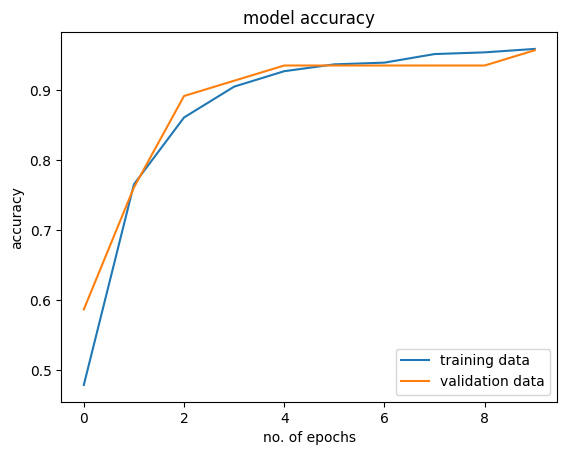

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')

plt.legend(['training data','validation data'], loc = 'lower right')

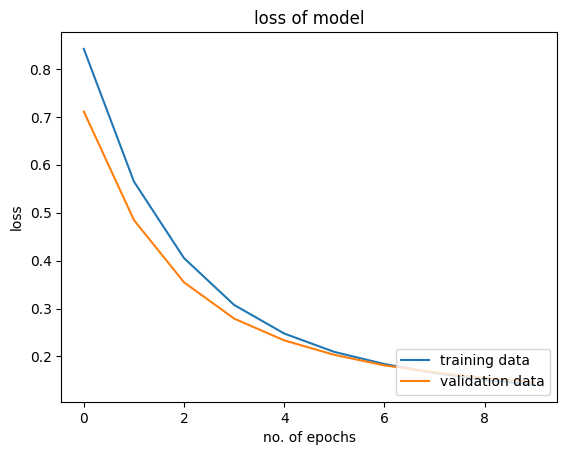

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss of model')
plt.xlabel('no. of epochs')
plt.ylabel('loss')

plt.legend(['training data','validation data'],loc = 'lower right')

In [25]:
y_pred = model.predict(x_test_sc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [31]:
y_pred

array([[0.26438385, 0.582498  ],
       [0.7332129 , 0.0716622 ],
       [0.68930095, 0.2840796 ],
       [0.19298913, 0.8573728 ],
       [0.04820339, 0.8365196 ],
       [0.99662316, 0.04146961],
       [0.96609116, 0.01778952],
       [0.6614212 , 0.23453647],
       [0.48485452, 0.43437546],
       [0.26796126, 0.7242453 ],
       [0.3333718 , 0.8599115 ],
       [0.5965476 , 0.24592875],
       [0.22729743, 0.76585895],
       [0.7739594 , 0.57770586],
       [0.03569335, 0.5180075 ],
       [0.90574867, 0.7271462 ],
       [0.08686487, 0.64453304],
       [0.05859192, 0.9509291 ],
       [0.02087774, 0.972637  ],
       [0.91537595, 0.06895375],
       [0.43382376, 0.4006716 ],
       [0.17511971, 0.7060653 ],
       [0.9819507 , 0.03224533],
       [0.08148679, 0.97318685],
       [0.22363551, 0.9516594 ],
       [0.21997832, 0.5722824 ],
       [0.08200333, 0.46629015],
       [0.21058664, 0.943981  ],
       [0.13900028, 0.79575145],
       [0.96359867, 0.05211762],
       [0.

In [33]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [34]:
y_pred_label

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

In [35]:
print("accuracy score is",round(accuracy_score(y_pred_label,y_test)*100,2),"%")

accuracy score is 97.37 %
